In [79]:
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

In [80]:
# df2=pd.read_csv('hawkeye_trace_16_2048_2.csv')
df_hawkeye=pd.read_csv('./traces/hawkeye_trace_16_2048.csv')
df_lru=pd.read_csv('./traces/lru_trace_16_2048.csv')

In [91]:
def get_hitrates(df):
  df=df[df['Program Counter']!=0]
  df_pc=df.groupby('Program Counter').mean()
  df_addr=df.groupby('Physical Address').mean()
  addr=list(df_addr.index)
  pc=list(df_pc.index)
  hit_pc=df_pc['Hit']
  hit_addr=df_addr['Hit']
  addr_counter=Counter(df['Physical Address'])
  pc_counter=Counter(df['Program Counter'])
  freq_addr=[]
  freq_pc=[]

  for add in addr:
    freq_addr+=[addr_counter[add]]
  for p in pc:
    freq_pc+=[pc_counter[p]]
  
  return addr,pc,hit_addr,hit_pc,freq_addr,freq_pc

In [92]:
_,_,hit_addr_hawkeye,hit_pc_hawkeye,freq_addr_hawkeye,freq_pc_hawkeye=get_hitrates(df_hawkeye)
_,_,hit_addr_lru,hit_pc_lru,freq_addr_lru,freq_pc_lru=get_hitrates(df_lru)

Text(0, 0.5, 'Mean Hit Rate')

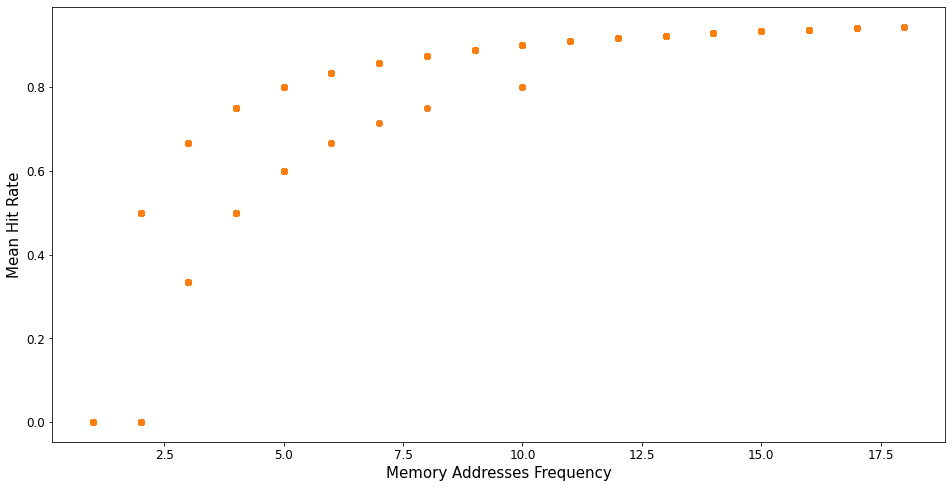

In [93]:
plt.figure(figsize=(16,8))
plt.scatter(freq_addr_hawkeye,hit_addr_hawkeye,c='tab:blue')
plt.scatter(freq_addr_lru,hit_addr_lru, c='tab:orange')

plt.xlabel('Memory Addresses Frequency',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Mean Hit Rate',fontsize=15)


Text(0, 0.5, 'Mean Hit Rate')

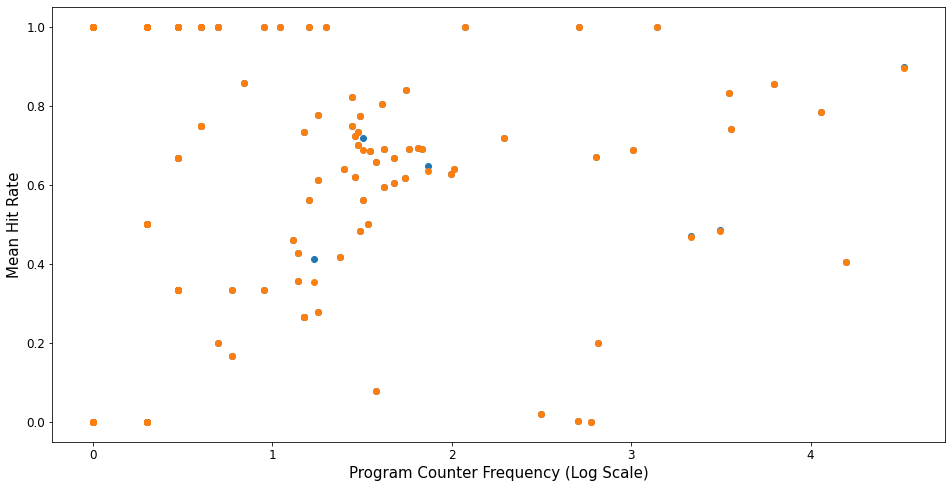

In [94]:
plt.figure(figsize=(16,8))
plt.scatter(np.log10(freq_pc_hawkeye),hit_pc_hawkeye)
plt.scatter(np.log10(freq_pc_lru),hit_pc_lru)
plt.xlabel('Program Counter Frequency (Log Scale)',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Mean Hit Rate',fontsize=15)
# plt.legend(['',''])